In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
#Reading the Dataset
df=pd.read_csv("carprices.csv")
df


,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi,59000,29400,5
6,Audi,52000,32000,5
7,Audi,72000,19300,6
8,Audi,91000,12000,8
9,Mercedez Benz,67000,22000,6


In [7]:
dummies=pd.get_dummies(df['Car Model'])
dummies

,Audi,BMW X5,Mercedez Benz,Toyota
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
5,True,False,False,False
6,True,False,False,False
7,True,False,False,False
8,True,False,False,False
9,False,False,True,False


In [9]:
# Convert boolean values (if any) to integers
dummies = dummies.astype(int)
print(dummies)

    Audi  BMW X5  Mercedez Benz   Toyota
0      0       1               0       0
1      0       1               0       0
2      0       1               0       0
3      0       1               0       0
4      0       1               0       0
5      1       0               0       0
6      1       0               0       0
7      1       0               0       0
8      1       0               0       0
9      0       0               1       0
10     0       0               1       0
11     0       0               1       0
12     0       0               1       0
13     0       0               0       1
14     0       0               0       1
15     0       0               0       1


    To concatenation of original and dummies

In [10]:
merge=pd.concat([df,dummies],axis='columns')
merge

,Car Model,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,BMW X5,69000,18000,6,0,1,0,0
1,BMW X5,35000,34000,3,0,1,0,0
2,BMW X5,57000,26100,5,0,1,0,0
3,BMW X5,22500,40000,2,0,1,0,0
4,BMW X5,46000,31500,4,0,1,0,0
5,Audi,59000,29400,5,1,0,0,0
6,Audi,52000,32000,5,1,0,0,0
7,Audi,72000,19300,6,1,0,0,0
8,Audi,91000,12000,8,1,0,0,0
9,Mercedez Benz,67000,22000,6,0,0,1,0


In [11]:
# Drop the Car Model

final =merge.drop(['Car Model'],axis='columns')
final

,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,69000,18000,6,0,1,0,0
1,35000,34000,3,0,1,0,0
2,57000,26100,5,0,1,0,0
3,22500,40000,2,0,1,0,0
4,46000,31500,4,0,1,0,0
5,59000,29400,5,1,0,0,0
6,52000,32000,5,1,0,0,0
7,72000,19300,6,1,0,0,0
8,91000,12000,8,1,0,0,0
9,67000,22000,6,0,0,1,0


In [25]:
final.columns

Index(['Mileage', 'Sell Price', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ',
       'Toyota'],
      dtype='object')

In [26]:
x=final.iloc[:,:-1].values
y=final.iloc[:,1].values

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=2)

In [28]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
x_pred=reg.predict(x_train)
y_pred=reg.predict(x_test)

ValueError: x and y must be the same size

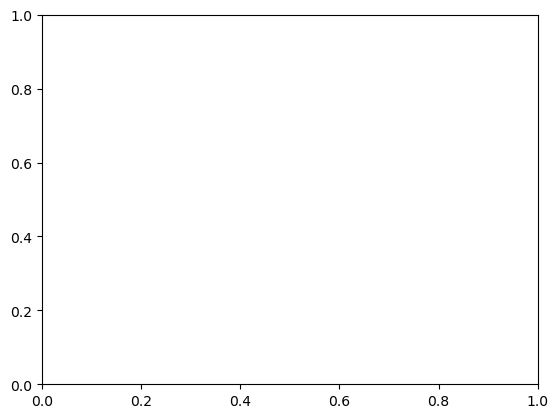

In [31]:
#TRAINING DATASET 
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,x_pred,color='red')
plt.title('Car Detail(Training Dataset)')
plt.xlabel('Mileage')
plt.ylabel('Selling Price(in Rupees)')
plt.show()

In [17]:
predictors = ['Mileage', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ', 'Toyota']
x=final[predictors]
y=final['Sell Price']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape,x_test.shape

((12, 6), (4, 6))

In [20]:
y_train.shape,y_test.shape

((12,), (4,))

In [21]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [22]:
model.score(x_train,y_train)

0.9728716233745528

In [23]:
model.score(x_test,y_test)

0.25595843205518065